# License Plate Recognition with YOLOv11 Object Detection

### Loading data from Google Drive
***data.zip*** contains dataset obtained from Roboflow Universe: [Dataset Source](https://universe.roboflow.com/roboflow-universe-projects/license-plate-recognition-rxg4e/dataset/11)

In [ ]:
## load data.zip from google drive
from google.colab import drive
drive.mount('/content/gdrive')

!cp /content/gdrive/MyDrive/license-plate-recog/data.zip /content

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
## unzip into custom_data folder
!unzip -q /content/data.zip -d /content/custom_data

In [ ]:
!pip install ultralytics

### Training YOLOv11 model

In [ ]:
!yolo detect train data=/content/custom_data/data.yaml model=yolo11s.pt batch=32 epochs=100 imgsz=512 patience=8

Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/custom_data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=8, perspective=0.0, plots=True, pose=12.0, pretrain

In [ ]:
!yolo detect predict model=runs/detect/train2/weights/best.pt source=custom_data/valid/images save=True

Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/2048 /content/custom_data/valid/images/00071c51c8e92a68_jpg.rf.446f345e7d5974082616d32dd8eb3d27.jpg: 512x512 1 License_Plate, 11.1ms
image 2/2048 /content/custom_data/valid/images/0011d11a6a5ab5ad_jpg.rf.1f1826e6aab333b74d8abb5073f16f30.jpg: 352x512 1 License_Plate, 45.9ms
image 3/2048 /content/custom_data/valid/images/00166578c691cd43_jpg.rf.bfa1273a2ac2e2800ee4df0246d98980.jpg: 512x384 1 License_Plate, 44.2ms
image 4/2048 /content/custom_data/valid/images/001679a19bb6fd3f_jpg.rf.2d93a7f26b44c5d3ef2cb219e2ecb403.jpg: 384x512 1 License_Plate, 42.8ms
image 5/2048 /content/custom_data/valid/images/0021af0b921af690_jpg.rf.d33465c327a36942a50e3217c1f9fd45.jpg: 288x512 (no detections), 44.6ms
image 6/2048 /content/custom_data/valid/images/0023d0908e76c600_jpg.rf.f37fcf6de5ce1b8e5ee18ed92a51341f.jpg: 384x512 2 License_

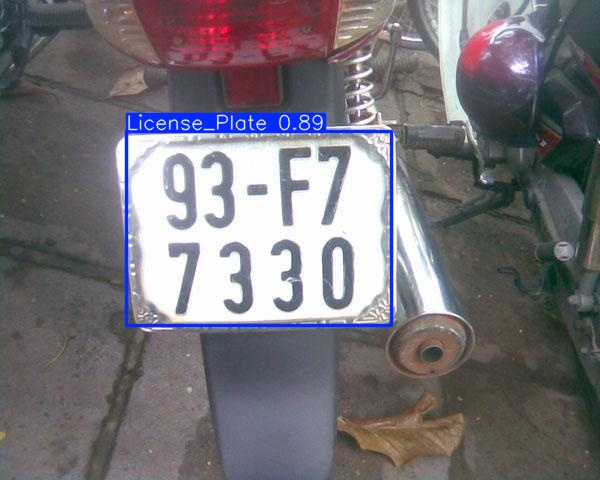

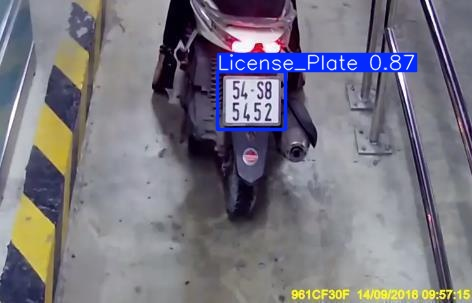

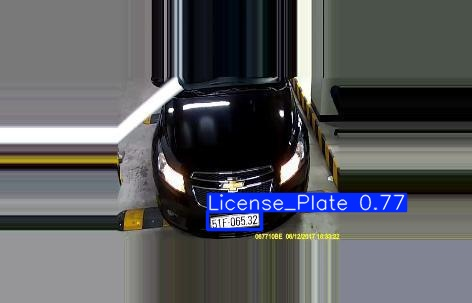

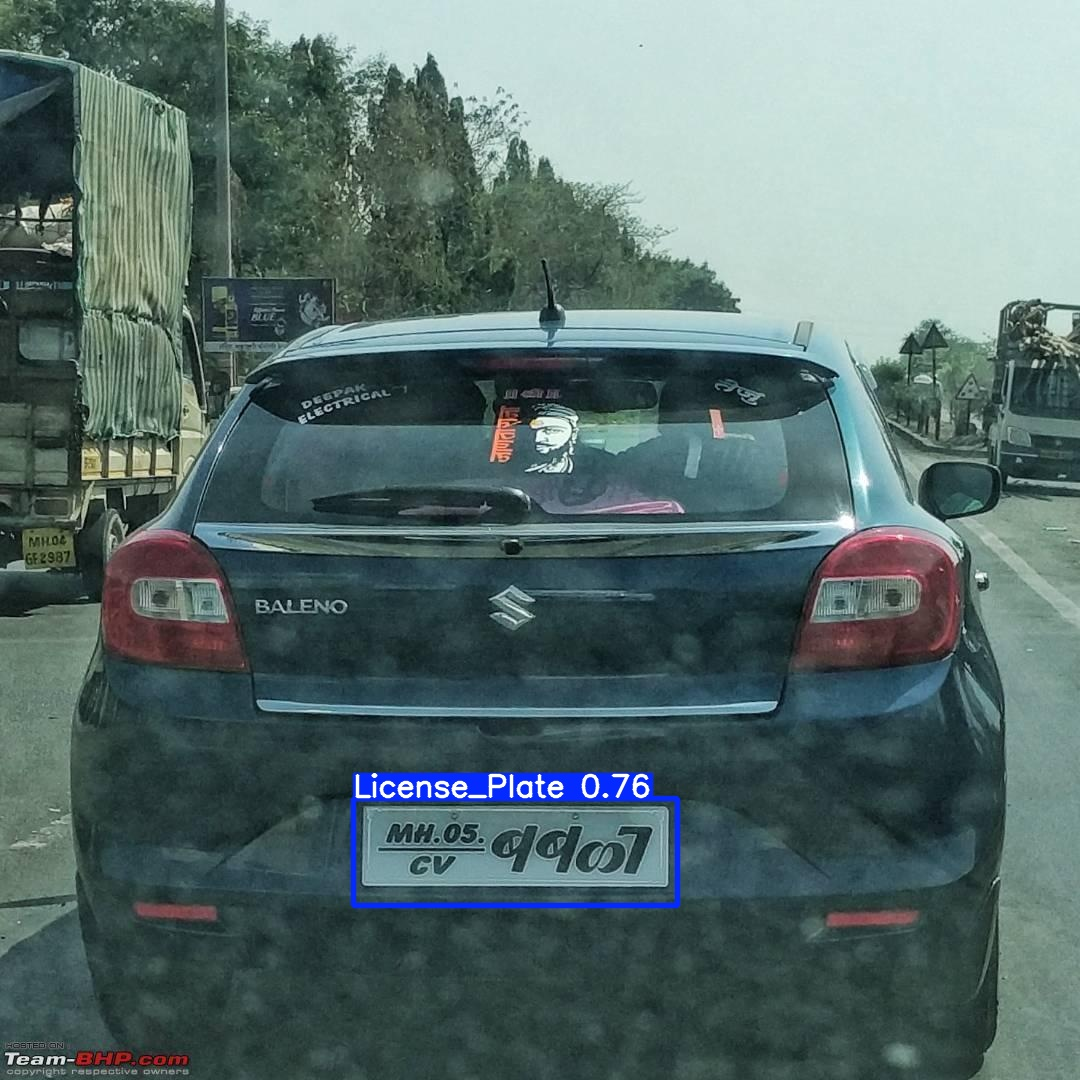

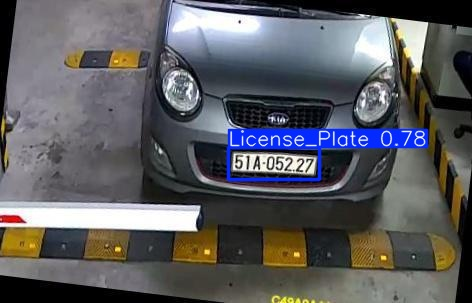

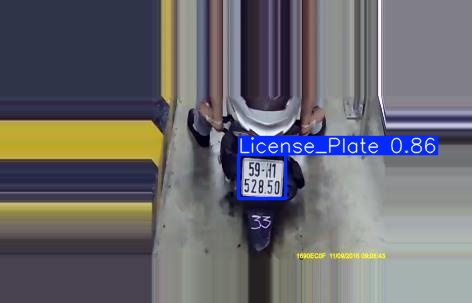

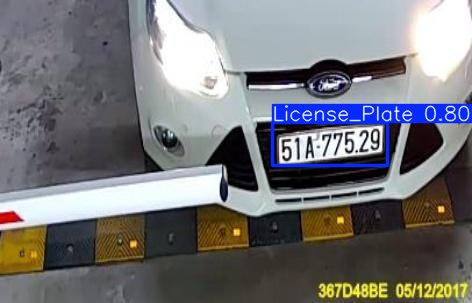

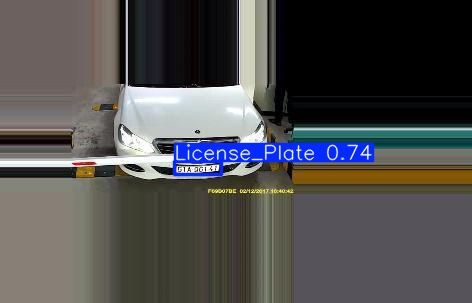

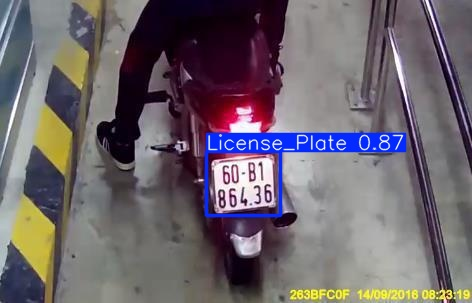

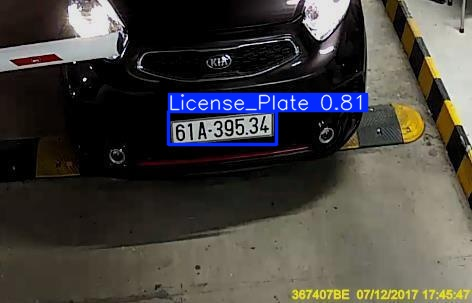

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')


### Save trained model

In [ ]:
!mkdir /content/my_model
!cp /content/runs/detect/train2/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train2 /content/my_model

%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train2
%cd /content

/content/my_model
updating: my_model.pt (deflated 8%)
  adding: train2/ (stored 0%)
  adding: train2/BoxPR_curve.png (deflated 25%)
  adding: train2/args.yaml (deflated 52%)
  adding: train2/train_batch2.jpg (deflated 6%)
  adding: train2/labels_correlogram.jpg (deflated 33%)
  adding: train2/labels.jpg (deflated 38%)
  adding: train2/val_batch2_pred.jpg (deflated 8%)
  adding: train2/weights/ (stored 0%)
  adding: train2/weights/best.pt (deflated 8%)
  adding: train2/weights/last.pt (deflated 8%)
  adding: train2/BoxP_curve.png (deflated 23%)
  adding: train2/BoxR_curve.png (deflated 16%)
  adding: train2/train_batch1.jpg (deflated 6%)
  adding: train2/confusion_matrix_normalized.png (deflated 34%)
  adding: train2/BoxF1_curve.png (deflated 16%)
  adding: train2/val_batch0_pred.jpg (deflated 9%)
  adding: train2/results.csv (deflated 62%)
  adding: train2/results.png (deflated 9%)
  adding: train2/val_batch2_labels.jpg (deflated 8%)
  adding: train2/val_batch1_pred.jpg (deflated 9%)
 

In [ ]:
from google.colab import files

files.download('/content/my_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>